In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Inferential statistics


In inferential statistics we again make inferences about a population given one or more samples. However, this time we make a **claim** about the population and use the sample(s) to estimate the likelihood of this claim by making assumptions.

## The one sample t-test

To explain this further, consider a lab where protein mixtures with known concentration for each protein are produced by a highly sensitive machine. Each day the machine is tested by sampling $n$ mixtures and measuring their protein concentrations. 

We focus on one protein "proteinA". To accomodate the mixture standards, the mean proteinA concentration should be 0.3 with a variance between the mixtures $< 0.01$.

Before we continue we make the following **assumptions**:

- the proteinA concentration follows a normal distribution
- the mixtures are drawn independently (this is of course not an assumption as we sampled the mixtures ourselves)

Let's say our machine is working properly. We draw $n=9$ mixtures at random from a day's batch of a perfectly working machine and measure the proteinA concentration:

In [4]:
n=9
#loc = mean, scale = standard deviation
x = np.random.normal(size=n,loc=0.3,scale=0.05)

We make the following claim: the mean proteinA concentration $\mu$ of the population from which $x$ is drawn is $\mu_0 = 0.3$. 

To investigate this we compute the difference $D_{observed}$ between our sample's mean $\overline{x}$ and the claimed population mean $\mu_0 = 0.3$:

In [5]:
mu0 = 0.3
D_observed = np.mean(x)-mu0
print("observed mean difference: %f"%D_observed)

observed mean difference: -0.010158


Is $D_{observed}$ **significant**? Should we conclude that something is wrong with the machine and stop it?

We know that our proteinA concentration population has indeed $\mu=0.3$ (again, in reality we don't have access to this information, we try to infer it from the sample).

Next we simulate drawing many ($m=100000$) samples $x$ with $n=9$ from this population. For each sample we compute the difference $D$ between the sample mean $\overline{x}$ and $\mu_0$

$$D = \overline{x}-\mu_0,$$

and plot the distribution of these differences $D$:

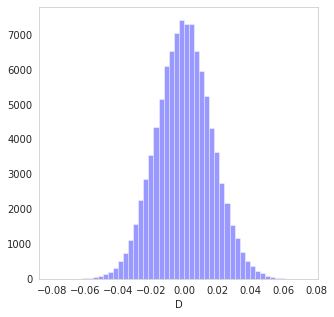

In [6]:
m = 100000
mean_diffs = []
for i in range(m):
    x_tmp = np.random.normal(size=n,loc=0.3,scale=0.05)
    D = np.mean(x_tmp)-mu0
    mean_diffs.append(D)
plt.figure(figsize=(5,5))
sns.distplot(mean_diffs,color="b",kde=False)
plt.xlabel("D")
plt.show()

Again, we know all the samples were drawn from a population with $\mu=\mu_0=0.3$. So, **none of the differences $D$ we observe in the above distribution are significant**. The distribution of all the differences $D$ is called the **null distribution** for the one sample t-test.

It is important to note that the shape of the null distribution depends strongly on the sample size $n$ and the variance $\sigma$ of the population from which the samples were drawn (so not on the actual value of $\mu$ itself). To illustrate this for the variance of the population we draw samples with $n=9$ from populations with an increasing variance and compute null distributions as we did before:

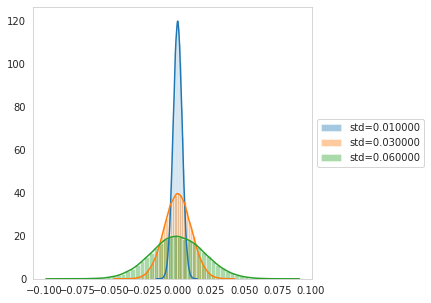

In [7]:
plt.figure(figsize=(5,5))
for sigma_new in [0.01,0.03,0.06]:
    mean_diffs = []
    for i in range(m):
        x_tmp = np.random.normal(size=n,loc=0.3,scale=sigma_new)
        D = np.mean(x_tmp)-mu0
        mean_diffs.append(D)
    sns.distplot(mean_diffs,label="std=%f"%sigma_new)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Again, none of these differences are significant.

Similarly for the sample size $n$, we fix the population variance and compute null distributions for different values of $n$:

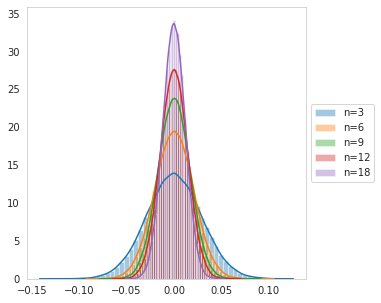

In [8]:
plt.figure(figsize=(5,5))
for n in [3,6,9,12,18]:
    mean_diffs = []
    for i in range(m):
        x_tmp = np.random.normal(size=n,loc=0.3,scale=0.05)
        D = np.mean(x_tmp)-mu0
        mean_diffs.append(D)
    sns.distplot(mean_diffs,label="n=%i"%n)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We observe that these shapes clearly differ. 

In hypothesis testing the dependency of the shape of the null distribution on the variance $\sigma$ of the population from which $x$ is drawn disappears by replacing $D$ with what is know as the **T-statistic**: 

$$T = \frac{\overline{x}-\mu}{s_{n-1}^2 / \sqrt{n}},$$

which follows a null distribution called the Student’s t-distribution with $n-1$ degrees of freedom. We can see that the T-statistic is very simmilar to the difference $D$, except for the normalization term $\frac{s_{n-1}^2}{\sqrt{n}}$. 

To illustrate this we draw samples with $n=9$ from populations with an increasing variance and plot a null distribution of the T-statistic for each of the populations (similarly as was done above):

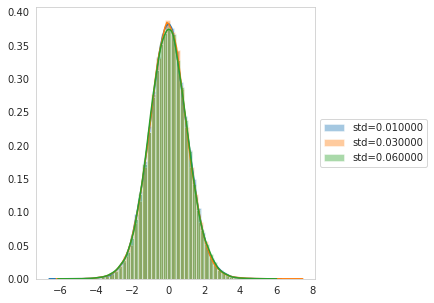

In [9]:
plt.figure(figsize=(5,5))
for sigma_new in [0.01,0.03,0.06]:
    mean_diffs = []
    for i in range(m):
        x_tmp = np.random.normal(size=n,loc=0.3,scale=0.05)
        T = (np.mean(x_tmp)-mu0) / (np.std(x_tmp)/np.sqrt(n))
        mean_diffs.append(T)
    sns.distplot(mean_diffs,label="std=%f"%sigma_new)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We see that the null distributions now all have the same shape. 

The dependency of the shape of the null distribution on the sample size $n$ is taken into account by the degrees of freedom (by choosing the Student’s t-distribution that corresponds to a sample size of $n-1$). 

From the Student’s t-distribution with $n-1$ degrees of freedom the probability of observing $\mu_0$ or a more extreme T-statistic is computed. This probability is called the **p-value**. 

Finally the p-value is compared against the **significance level** $\alpha$.

If the probability of observing $\mu_0$ under the null distribution (the p-value) is equal or smaller than $\alpha$ then we call this difference significant and conclude that the sample is not drawn from a population with mean $\mu=\mu_0$.

We have just performed a one sample t-test. This hypothesis test claims that the mean of a population $\mu$ from which a sample is drawn is equal to some value $\mu_0$. 

As with all hypothesis testing there are two hypothesis:

- The null hypothesis ($H_0$) states that $\mu=\mu_0$.
- The two-tailed hypothesis ($H_1$) states that $\mu \ne \mu_0$.

There are also two possible one-tailed hypothesis:

- The upper-tailed hypothesis ($H_1$) states that $\mu > \mu_0$.
- The lower-tailed hypothesis ($H_1$) states that $\mu < \mu_0$.

If the computed p-value is equal to or smaller than the significance level $\alpha$ we reject $H_0$ and accept $H_1$.

We can simply perform a one sample t-test as:

In [10]:
import scipy.stats as stats
stats.ttest_1samp(np.array(x),mu0)

Ttest_1sampResult(statistic=-0.4467647978644402, pvalue=0.6668917378539923)

Given this p-value we accept $H_0$ at $\alpha$=0.01.

Now, suppose we draw a sample of the protein mixtures on another day:

In [11]:
x_bad = np.random.normal(size=n,loc=0.37,scale=0.05)
print("Mean bad sample: %f"%np.mean(x_bad))
stats.ttest_1samp(np.array(x_bad), mu0)

Mean bad sample: 0.370894


Ttest_1sampResult(statistic=7.432071395989882, pvalue=9.800010644648027e-07)

This time the p-value is much lower and more than low enough ($\alpha=0.01$) to conclude that the mean proteinA concentration in the mixtures is not 0.3. 

## The (unpaired) two sample t-test for equal means

The unpaired two sample t-test for equal means is a hypothesis test that claims that the means of two samples $x_1$ with sample size $n_1$ and $x_2$ with sample size $n_2$ are equal. It makes the following assumptions:

- both samples are drawn from a normal distribution
- both samples are drawn from populations with equal variance
- the samples should be drawn independently

Again we define two hypothesis:

- The null hypothesis $H_0$ states that $\overline{x}_1 = \overline{x}_2$.
- The two-tailed alternative hypothesis $H_1$ states that $\overline{x}_1 \ne \overline{x}_2$.

The T-statistic that is used to test the null hypothesis is:

$$T = \frac{\overline{x}_1 - \overline{x}_2}{SE(\overline{x}_1 - \overline{x}_2)}$$

where the denominator is the standard error of the difference between the means. It is computed as 

$$SE(\overline{x}_1 - \overline{x}_2) = s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$

where $s_p$ is the pooled variance of both samples and is computed as

$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 +n_2 -2}}$$

where $s_1$ and $s_2$ are the standard deviations of samples $x_1$ and $x_2$ respectively. This T-statistic follows a Student’s t-distribution with $n_1+n_2-2$ degrees of freedom.

Now what does this mean? To explain this we should understand the unpaired two sample t-test for equal means as a test to determine whether two independent samples with equal variance were drawn from populations having the same normal distribution. 


To illustrate we again assume we know the full population.

First we compute a null distribution for the difference $D$ between the means (so without the standard error in the denominator), i.e.

$D=\overline{x}_1-\overline{x}_2.$

We do this by repeatedly drawing $m$ times two samples with $n_1=n_2=9$ from the same population and computing $D$ for each of the two samples: 

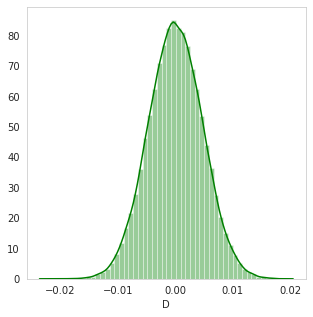

In [12]:
n = 9
null_distribution = []
for i in range(m):
    x1 = np.random.normal(size=n,loc=0.26,scale=0.01)
    x2 = np.random.normal(size=n,loc=0.26,scale=0.01)
    D = (np.mean(x1)-np.mean(x2))
    null_distribution.append(D)
plt.figure(figsize=(5,5))
sns.distplot(np.array(null_distribution),color="g")
plt.xlabel("D")
plt.show()

Again, even though both samples are drawn from the same population they do show differences in mean that we know are not significant.

Just as with the one sample t-test the shape of this distribution depends on the variance of the population from which the samples are drawn. We can see this by plotting null distributions for $D$ by sampling from populations with an increasing variance:

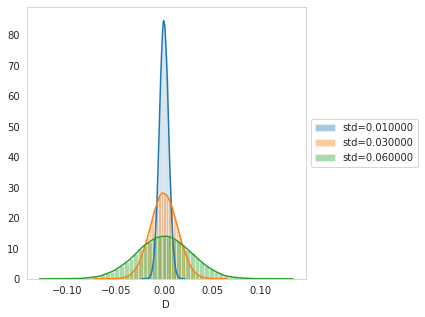

In [13]:
plt.figure(figsize=(5,5))
for sigma_gene_new in [0.01,0.03,0.06]:
    null_distribution_new = []
    for i in range(m):
        x1 = np.random.normal(size=n,loc=0.26,scale=sigma_gene_new)
        x2 = np.random.normal(size=n,loc=0.26,scale=sigma_gene_new)
        D = (np.mean(x1)-np.mean(x2))
        null_distribution_new.append(D)
    sns.distplot(np.array(null_distribution_new),label="std=%f"%sigma_gene_new)
plt.xlabel("D")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The standard error of the difference between the means in the denominator of the T-statistic removes this dependency:

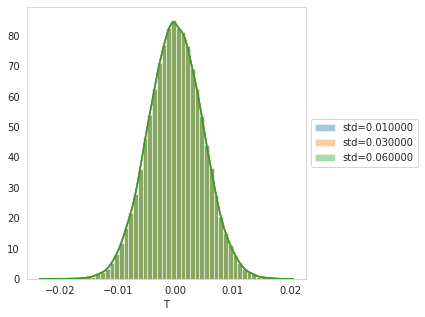

In [14]:
# a function to compute the T-statistic from two samples x1 and x2
def compute_T_statistic(x1,x2):
    sp = np.sqrt(((n-1)*np.var(x1)+(n-1)*np.var(x2))/float(n+n-2))
    SE = sp * np.sqrt((1./n)+(1./n))
    T_statistic = (np.mean(x1)-np.mean(x2))/SE
    return T_statistic

plt.figure(figsize=(5,5))    
for sigma_gene_new in [0.01,0.03,0.06]:
    null_distribution_new = []
    for i in range(m):
        x1 = np.random.normal(size=n,loc=0.26,scale=sigma_gene_new)
        x2 = np.random.normal(size=n,loc=0.26,scale=sigma_gene_new)
        null_distribution_new.append(compute_T_statistic(x1,x2)) #this is the only part that changed
    sns.distplot(np.array(null_distribution),label="std=%f"%sigma_gene_new)

plt.xlabel("T")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

This leaves us with a null distribution for the T-statistic that depends only on $n_1$ and $n_2$ which is taken care of by the degrees of freedom for the Student’s t-distribution.

Before we continue we a create the null distribution for samples sizes $n_1=n_2=9$ by repeadelty sampling $x_1$ and $x_2$ **from the same population**. Note that this null distribution does not depend on the mean $\mu$ of the population.

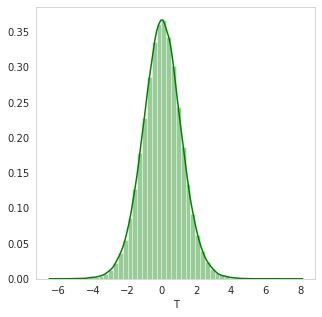

In [22]:
n = 9
null_distribution = []
for i in range(m):
    x1 = np.random.normal(size=n,loc=0.26,scale=0.01)
    x2 = np.random.normal(size=n,loc=0.26,scale=0.01)
    null_distribution.append(compute_T_statistic(x1,x2))
plt.figure(figsize=(5,5))    
sns.distplot(np.array(null_distribution),color="g")
plt.xlabel("T")
plt.show()

Now, let's say we have two genes geneA and geneB and we want to know whether the mean expression level of these genes is the same. 

First we look at the case where the mean expression is indeed the same. We draw a sample for geneA and a sample for geneB with $n_A=n_B=9$ and compute the T-statistic:

In [17]:
geneA = np.random.normal(size=n,loc=0.26,scale=0.01)
print("Mean geneA: %f" % np.mean(geneA))
geneB = np.random.normal(size=n,loc=0.26,scale=0.01)
print("Mean geneB: %f" % np.mean(geneB))
print("Mean difference: %f" % (np.mean(geneA)-np.mean(geneB)))
T_observed = compute_T_statistic(geneA,geneB)
print("T-statistic: %f" % T_observed)

Mean geneA: 0.255630
Mean geneB: 0.257299
Mean difference: -0.001669
T-statistic: -0.310020


Next we compute the corresponding p-value:

In [18]:
print("p-value=%f"%stats.ttest_ind(geneA,geneB)[1])

p-value=0.773821


This is the p-value we obtain for our test. Again we need to set a significance level $\alpha$ to decide on rejecting the null hypothesis and therefor accepting the alternative hypothesis.

Now let's look at the case where geneB is sampled from a population with a different mean:

In [20]:
geneA = np.random.normal(size=n,loc=0.26,scale=0.01)
print("Mean geneA: %f" % np.mean(geneA))
geneB = np.random.normal(size=n,loc=0.275,scale=0.01)
print("Mean geneB: %f" % np.mean(geneB))
print("Mean difference: %f" % (np.mean(geneA)-np.mean(geneB)))
T_observed = compute_T_statistic(geneA,geneB)
print("T-statistic: %f" % T_observed)
print("p-value=%f"%stats.ttest_ind(geneA,geneB)[1])

Mean geneA: 0.262518
Mean geneB: 0.274786
Mean difference: -0.012267
T-statistic: -1.992783
p-value=0.078613


As expected, this p-value is much smaller.

It should be clear to you by now that different samples of geneA and geneB will produce different T-statistics and as such different p-values. So, **depending the sample sometimes we will correctly reject the null hypothesis and sometimes we will incorrectly accept it even though the samples are drawn from populations with different means**!

Let's illustrate this by repeatedly drawing samples for geneA and geneB, computing the p-value and plotting these p-values as a boxplot: 

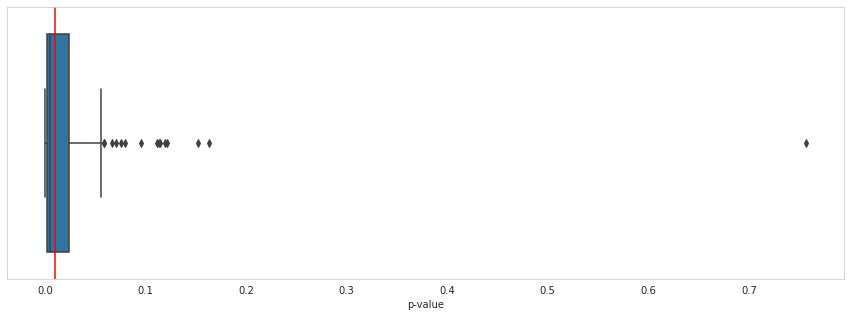

In [23]:
pvalues = []
for i in range(100):
    geneA = np.random.normal(size=n,loc=0.26,scale=0.01)
    geneB = np.random.normal(size=n,loc=0.275,scale=0.01)
    pvalues.append(stats.ttest_ind(geneA,geneB).pvalue)
df = pd.DataFrame()
df["p-values"] = pvalues
plt.figure(figsize=(15,5))
sns.boxplot(df,showfliers=True)
plt.axvline(x=0.01,c='r')
plt.xlabel("p-value")
plt.show()

The red line corresponds to $\alpha=0.01$. The boxplot shows that even though the mean expression level between geneA and geneB is not equal, in many cases the null hypothesis is incorrectly accepted ($\alpha>0.01$). 
It just depends on the samples that were drawn, i.e. random chance.

This brings us to the notion of **the power of a hypothesis test**. It is defined as the probability of correctly rejecting a false null hypothesis. To explain this we consider the situation where we increase the variance of the populations from which the samples are drawn while keeping the difference between the mean of the two populations and the sample sizes $n_1=n_2=n$ constant. 

The following boxplot shows the p-values obtained by repeatedly drawing samples for geneA and geneB from populations with increasing variance:

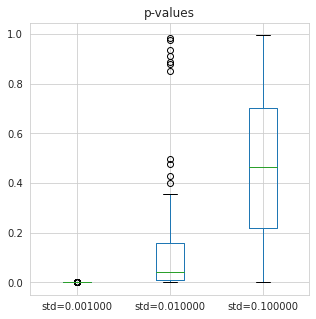

In [24]:
df = pd.DataFrame()
for sigma in [0.001,0.01,0.1]:
    pvalues = []
    for i in range(100):
        geneA = np.random.normal(size=n,loc=0.26,scale=sigma)
        geneB = np.random.normal(size=n,loc=0.27,scale=sigma)
        pvalues.append(stats.ttest_ind(geneA,geneB).pvalue)
    df["std=%f"%sigma] = pvalues
plt.figure(figsize=(5,5))
df.boxplot()
plt.title("p-values")
plt.show()

The boxplots show how the p-values become larger for an increasing population variance.
So the power of the two sample t-test decreases as the variance of the populations increases.

Similarly, for a fixed difference in mean and a fixed variance of the populations we can look at the effect of an increasing sample sizes $n_1$ and $n_2$. We will look at the case where $n_1=n_2=n$: 

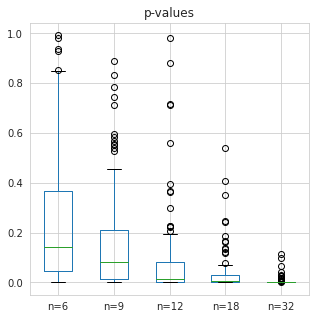

In [25]:
df = pd.DataFrame()
for n_tmp in [6,9,12,18,32]:
    pvalues = []
    for i in range(100):
        geneA = np.random.normal(size=n_tmp,loc=0.26,scale=0.01)
        geneB = np.random.normal(size=n_tmp,loc=0.27,scale=0.01)
        pvalues.append(stats.ttest_ind(geneA,geneB).pvalue)
    df["n=%i"%n_tmp] = pvalues
plt.figure(figsize=(5,5))
df.boxplot()
plt.title("p-values")
plt.show()

We can see that the power of the two sample t-test increase as the sample size increases. In fact, and this is important, **for increasingly larger sample sizes any difference between the means will become significant**.

## The paired two sample t-test for equal means

The paired two sample t-test for equal means is a hypothesis test that claims that the means of two samples $x_1$ with sample size $n$ and $x_2$ with sample size $n$ are equal for the case where observations in one sample can be paired with observations in the other sample.

In this case the T-statistic that is used to test the null hypothesis is:

$$T = \frac{\overline{d}}{SE(\overline{d})},$$

where $\overline{d}$ is the mean difference between the paired observations and $SE(\overline{d})$ is the standard error of the mean difference. It is computed as 

$$SE(\overline{d}) = \frac{s_d}{\sqrt{n}},$$

where $s_d$ is the standard deviation of the differences between the paired observations. This T-statistic follows a Student’s t-distribution with $n-1$ degrees of freedom.

As an example consider measuring the expression level of geneA in $n=9$ randomly selected persons at two time points $t_1$ and $t_2$. The measurement at $t_1$ is a control measurement while $t_2$ is a measurement after taking a certain drug. We want to know if the drug has any effect on the expression level of geneA. We do this by comparing the mean expression level of geneA at $t_1$ with the mean expression level at $t_2$.   

First, we consider the case where there is no difference in mean expression between $t_1$ and $t_2$. We draw two samples from the population of geneA expression levels and pair the observations at random, i.e. the pairing has no specific meaning:

In [26]:
n = 9
geneA_t1 = np.random.normal(size=n,loc=0.26,scale=0.01)
geneA_t2 = np.random.normal(size=n,loc=0.26,scale=0.01)
# create DataFrame
df = pd.DataFrame()
df["geneA_t1"] = geneA_t1
df["geneA_t2"] = geneA_t2
df.head()

,geneA_t1,geneA_t2
0,0.255726,0.245087
1,0.268014,0.246149
2,0.266651,0.247945
3,0.249532,0.276463
4,0.264754,0.274302


We consider each row in this dataset a paired observation (one person measured at two different time points). 

To make this more clear we can plot these observations:

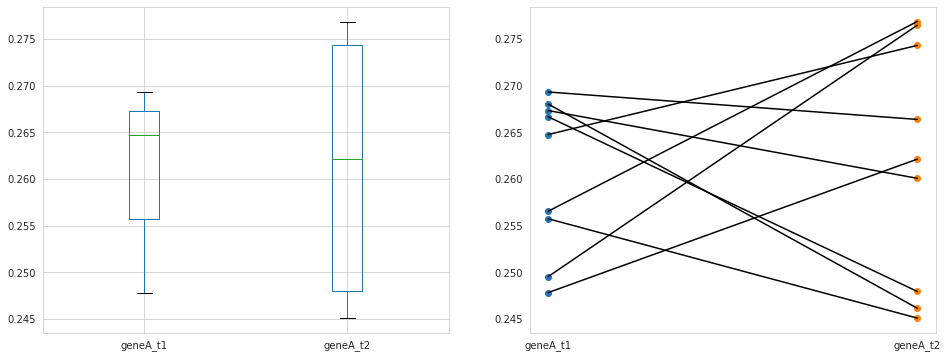

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df.boxplot()
plt.subplot(1,2,2)
plt.scatter(np.zeros(len(geneA_t1)), geneA_t1)
plt.scatter(np.ones(len(geneA_t2)), geneA_t2)
for i in range(len(geneA_t1)):
    plt.plot( [0,1], [geneA_t1[i], geneA_t2[i]], c='k')
plt.xticks([0,1], ['geneA_t1', 'geneA_t2'])
plt.show()

The plot on the right shows how the observations are paired. We have seen that we can perform an unpaired two sample t-test using the following code:

In [28]:
stats.ttest_ind(geneA_t1,geneA_t2)

Ttest_indResult(statistic=-0.20983718209682806, pvalue=0.8364434071731507)

The code to perform a paired two sample t-test is:

In [29]:
stats.ttest_rel(geneA_t1,geneA_t2)

Ttest_relResult(statistic=-0.18542501756175578, pvalue=0.8575106469468194)

We can see that both tests accept the null hypothesis for $\alpha = 0.01$.
Now let's again create paired observations but this time the expression level for the observation in $t_2$ is consistently higher as compared to the same observation in $t_1$: 

In [30]:
geneA_t1 = np.random.normal(size=n,loc=0.26,scale=0.01)
geneA_t2 = geneA_t1 + np.random.normal(size=n,loc=0.005,scale=0.001) 
# create DataFrame
df = pd.DataFrame()
df["geneA_t1"] = geneA_t1
df["geneA_t2"] = geneA_t2
df.head()

,geneA_t1,geneA_t2
0,0.260036,0.266842
1,0.275338,0.278329
2,0.264485,0.269106
3,0.263982,0.268610
4,0.262791,0.268303


We can again plot this dataset:

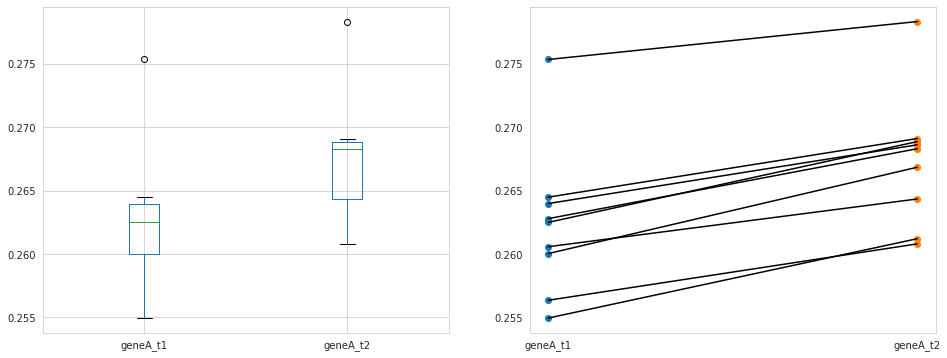

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df.boxplot()
plt.subplot(1,2,2)
plt.scatter(np.zeros(len(geneA_t1)), geneA_t1)
plt.scatter(np.ones(len(geneA_t2)), geneA_t2)
for i in range(len(geneA_t1)):
    plt.plot( [0,1], [geneA_t1[i], geneA_t2[i]], c='k')
plt.xticks([0,1], ['geneA_t1', 'geneA_t2'])
plt.show()

We compare the unpaired and paired t-test gain:

In [32]:
print("unpaired test: %f" % stats.ttest_ind(geneA_t1,geneA_t2).pvalue)
print("paired test: %f" % stats.ttest_rel(geneA_t1,geneA_t2).pvalue)

unpaired test: 0.072061
paired test: 0.000002


Now we see a big diference between the p-values computed by both test. While the unpaired t-test does not conclude a difference in mean between $t_1$ and $t_2$, the paired t-test does. From the paired t-test we would conclude that the drug does have a consistent effect on the expression level of geneA, which is true.

That means that **for paired observations the power of the paired t-test is much higher**.


## Non-parametric hypothesis tests

So far we have seen what we call **parametric hypothesis tests** that make assumptions about the shape of the population(s) from which the samples are drawn. In the tests we have discussed the distribution of the populations was assumed to be normal. 

However, many cases exist where this assumption cannot be made. In these cases a **non-parametric hypothesis test** that does not make such assumptions should be used to make inferences about the population. 

So, it there exists a non-parametric test then why use a parametric test? The answer is that the parametric test will have more statistical power, especially for small sample sizes.

To illustrate this we compare the parametric two sample t-test with it's non-parametric alternative: the **Mann–Whitney U test** which tests for equality of the median of the samples.

We draw 100 samples with size $n=4$ from two normal populations with different mean. We compute the p-value for the t-test and Mann-Whitney test for each pair of samples. 

From these 100 p-values we can compute the power for each test:

t-test power for n=4: 0.30
Mann-Whitney power for n=4: 0.00


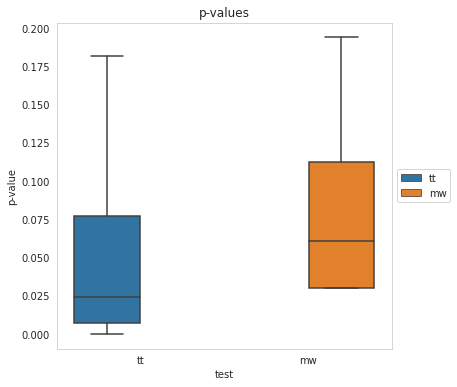

In [34]:
n = 4
alpha = 0.01
df = pd.DataFrame()
pvalues = []
tests = []
correct_tt = 0
correct_mw = 0
for i in range(1000):
    p1 = np.random.normal(size=n,loc=0.26,scale=0.01)
    p2 = np.random.normal(size=n,loc=0.28,scale=0.01)
    pvalue = stats.ttest_ind(p1,p2).pvalue
    pvalues.append(pvalue)
    if pvalue <= alpha:
        correct_tt+=1
    tests.append("tt")
    pvalue = stats.mannwhitneyu(p1,p2,alternative="two-sided").pvalue
    pvalues.append(pvalue)
    if pvalue <= alpha:
        correct_mw+=1
    tests.append("mw")
power_tt = correct_tt/1000.
print("t-test power for n=%i: %.2f" % (n,power_tt))
power_mw = correct_mw/1000.
print("Mann-Whitney power for n=%i: %.2f" % (n,power_mw))
df = pd.DataFrame()
df["p-value"] = pvalues
df["test"] = tests
plt.figure(figsize=(6,6))
sns.boxplot(x="test",y="p-value",hue="test",data=df,showfliers=False)
plt.title("p-values")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We can see that the two sample t-test has more power for normal distributions.

Now we do the exact same thing but for increasing sample sizes $n$:

t-test power for n=3: 0.18
Mann-Whitney power for n=3: 0.00
t-test power for n=4: 0.29
Mann-Whitney power for n=4: 0.00
t-test power for n=5: 0.50
Mann-Whitney power for n=5: 0.00
t-test power for n=6: 0.65
Mann-Whitney power for n=6: 0.52
t-test power for n=7: 0.71
Mann-Whitney power for n=7: 0.42
t-test power for n=8: 0.82
Mann-Whitney power for n=8: 0.66
t-test power for n=9: 0.83
Mann-Whitney power for n=9: 0.78
t-test power for n=10: 0.94
Mann-Whitney power for n=10: 0.93


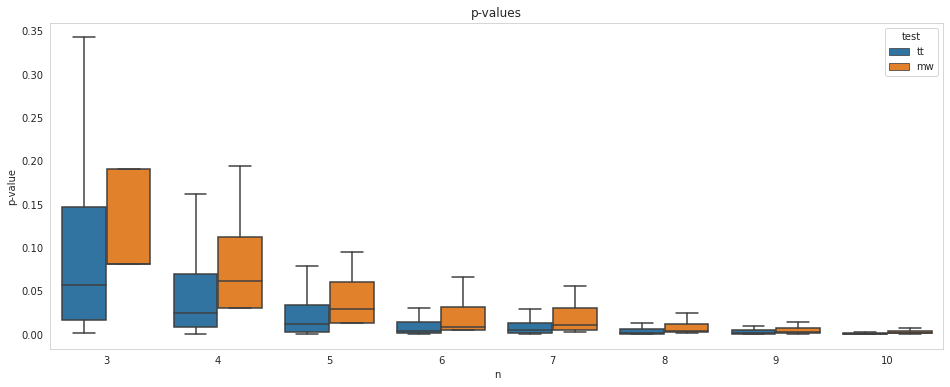

In [36]:
alpha = 0.01
df = pd.DataFrame()
pvalues = []
ns = []
tests = []
for n in range(3,11,1):
    correct_tt = 0
    correct_mw = 0
    for i in range(100):
        p1 = np.random.normal(size=n,loc=0.26,scale=0.01)
        p2 = np.random.normal(size=n,loc=0.28,scale=0.01)
        pvalue = stats.ttest_ind(p1,p2).pvalue
        pvalues.append(pvalue)
        if pvalue <= alpha:
            correct_tt+=1
        tests.append("tt")
        ns.append(n)
        pvalue = stats.mannwhitneyu(p1,p2,alternative="two-sided").pvalue
        pvalues.append(pvalue)
        if pvalue <= alpha:
            correct_mw+=1
        tests.append("mw")
        ns.append(n)
    power_tt = correct_tt/100.
    print("t-test power for n=%i: %.2f" % (n,power_tt))
    power_mw = correct_mw/100.
    print("Mann-Whitney power for n=%i: %.2f" % (n,power_mw))
df = pd.DataFrame()
df["p-value"] = pvalues
df["test"] = tests
df["n"] = ns
plt.figure(figsize=(16,6))
sns.boxplot(x="n",y="p-value",hue="test",data=df,showfliers=False)
plt.title("p-values")
plt.show()

We can see that the t-test consistently has more power for for sample sizes up to $n=10$. The difference in power between the test does however decrease fast for larger sample sizes.